<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/MiniProject3Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

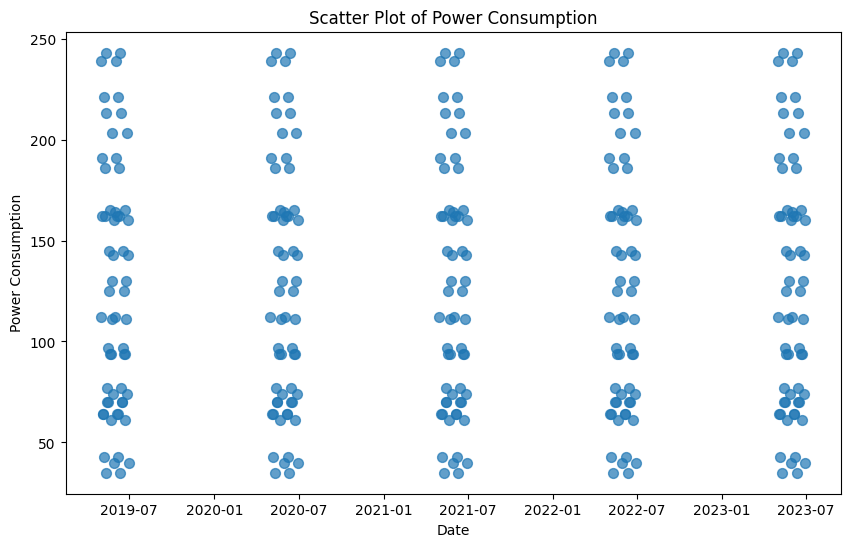

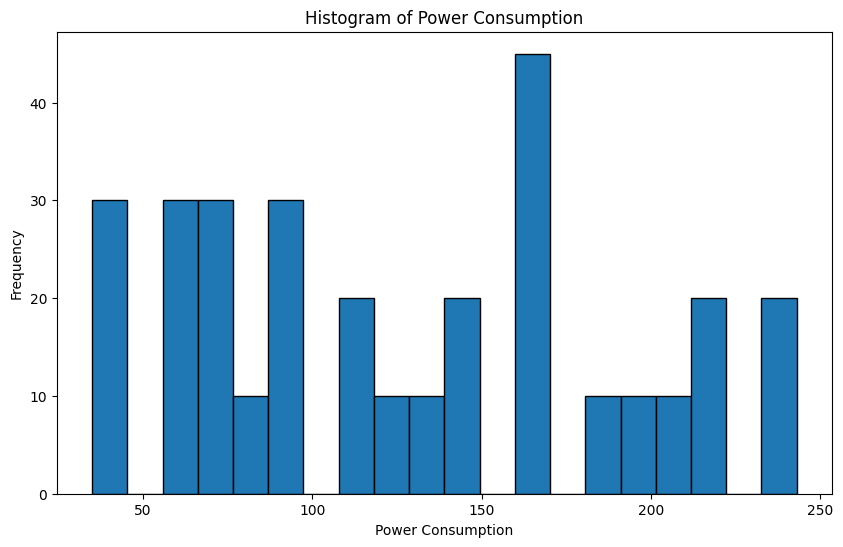

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


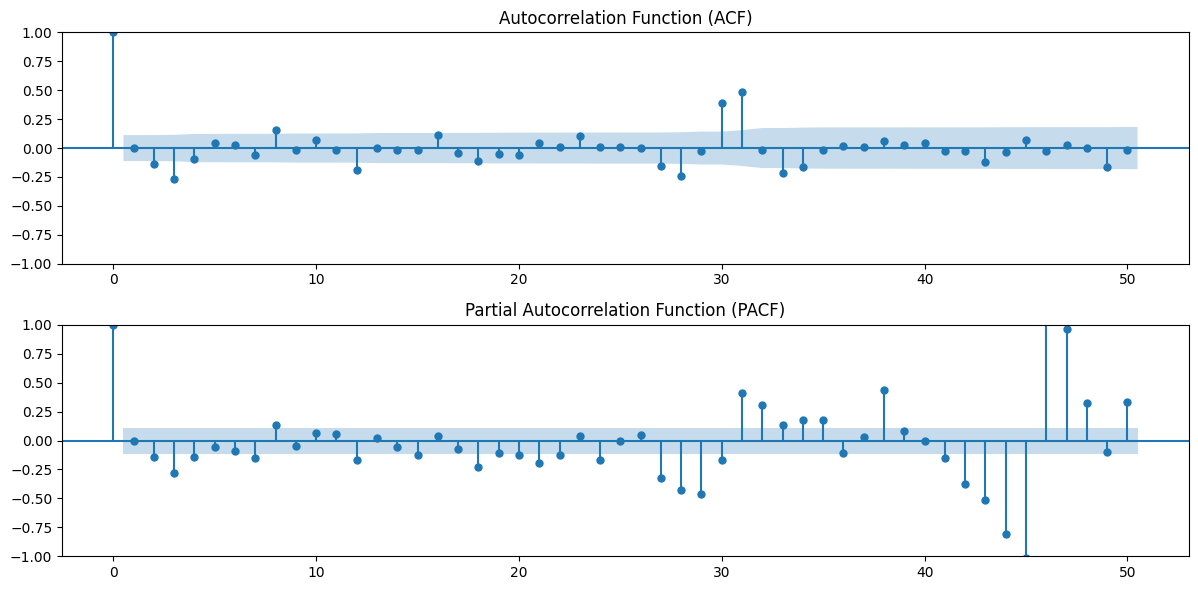

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


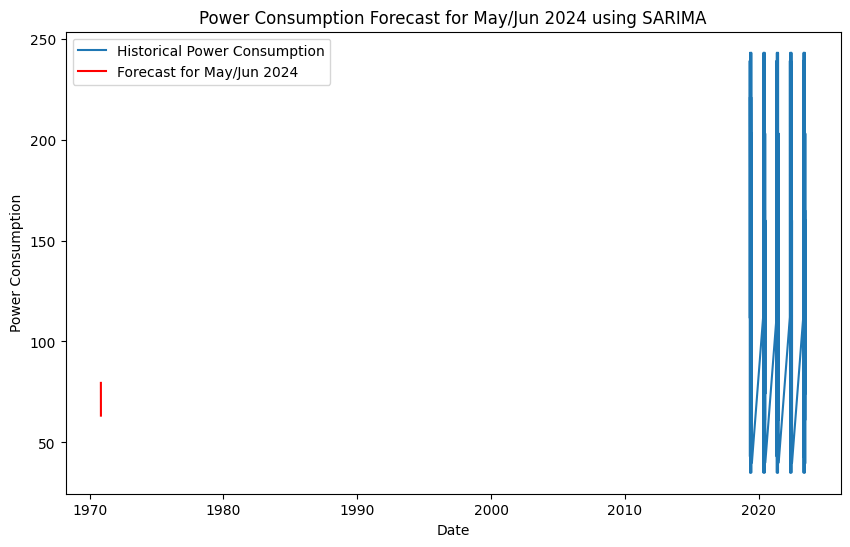

Mean Absolute Error (MAE): 41.11408322128745
Root Mean Squared Error (RMSE): 42.46018368307538


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Read data from the Excel file
excel_file = 'power_consumption_data.xlsx'
power_data = pd.read_excel(excel_file, parse_dates=['timestamp'])

# Step 2: Data Analysis and Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(power_data['timestamp'], power_data['power_consumption'], s=50, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Scatter Plot of Power Consumption')
plt.show()

# Step 3: Data Analysis and Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(power_data['power_consumption'], bins=20, edgecolor='black')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Power Consumption')
plt.show()

# Step 4: Prepare data for SARIMA
# Assuming you have already prepared the time series data in the 'power_data' DataFrame.

# Set the 'timestamp' column as the DataFrame index
power_data.set_index('timestamp', inplace=True)

# Step 5: Determine order and seasonal_order parameters using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Assuming the ACF plot shows a significant spike at lag 12, and PACF plot shows a significant spike at lag 1.

# Step 6: Train the SARIMA model on the entire dataset
order = (1, 1, 0)           # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

model = SARIMAX(power_data['power_consumption'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)

# Step 7: Forecast power requirements for May/Jun 2024
forecast_period = 2
forecast = fitted_model.get_forecast(steps=forecast_period)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean

# Step 8: Plot Forecast Results
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.show()

# Step 9: Evaluate Model Performance (using MAE and RMSE)
# Assuming you have actual data for May and June 2024 (replace the actual_power values below).

# Assuming 'forecast' contains the predictions made by the SARIMA model for May and June 2024.
forecast_values = forecast.predicted_mean

# Assuming actual_power contains the actual power consumption for May and June 2024.
actual_power = pd.Series([110, 115], index=forecast_values.index)  # Replace these values with the actual data

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_power, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_power, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")


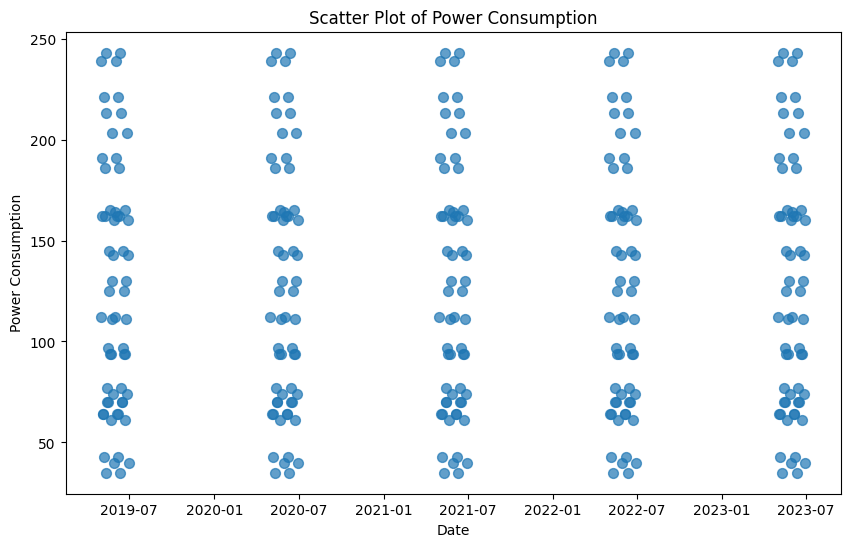

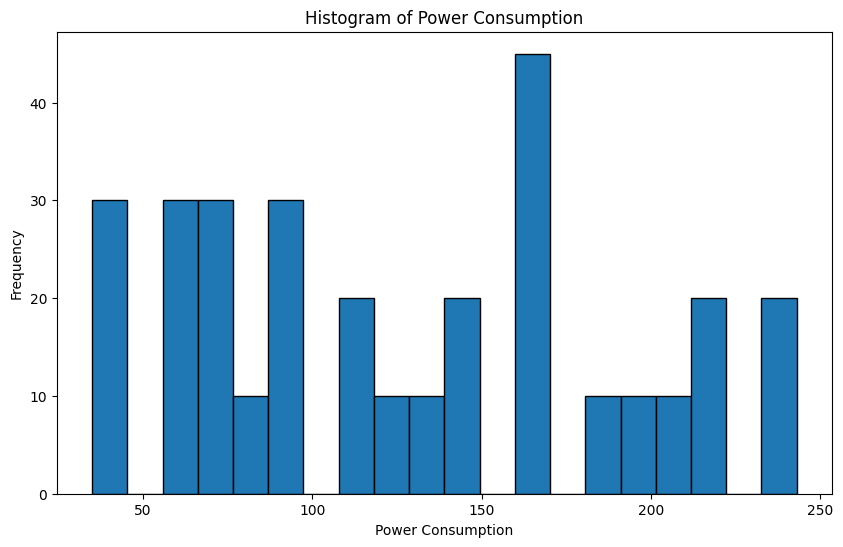

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


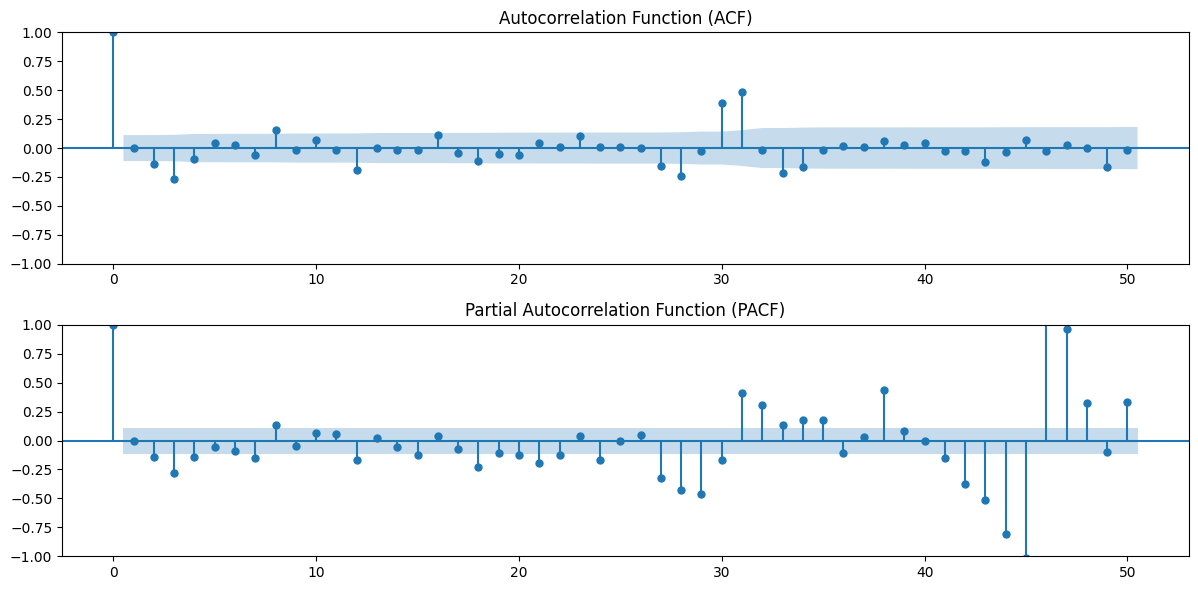

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


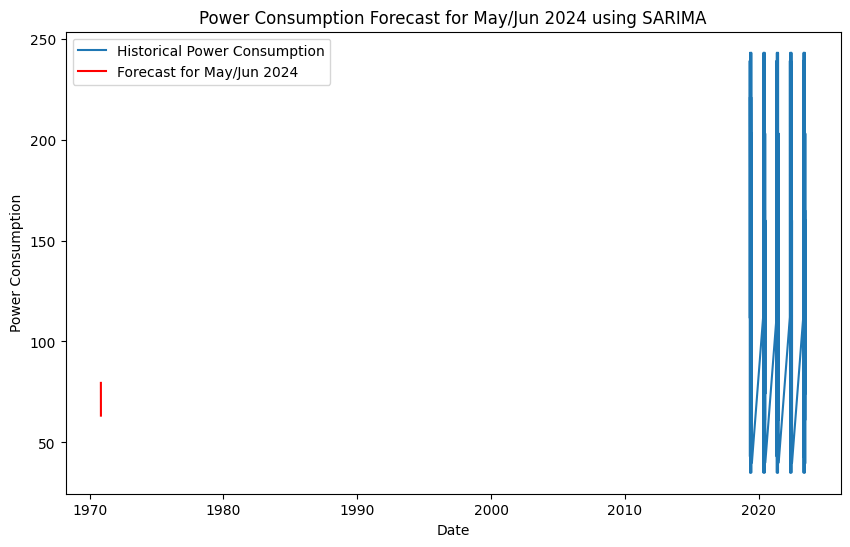

Mean Absolute Error (MAE): 41.11408322128745
Root Mean Squared Error (RMSE): 42.46018368307538
Forecasted power consumption for May and June 2024 has been saved to 'forecasted_power_consumption.xlsx'.


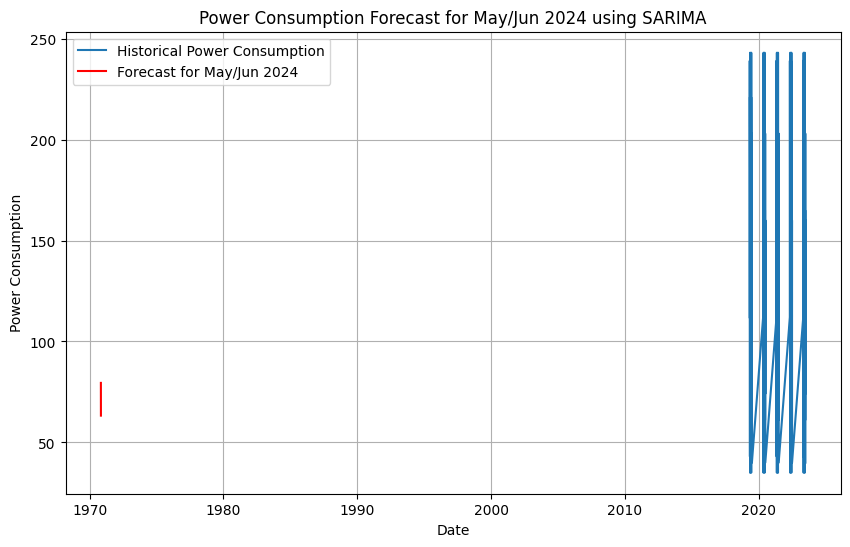

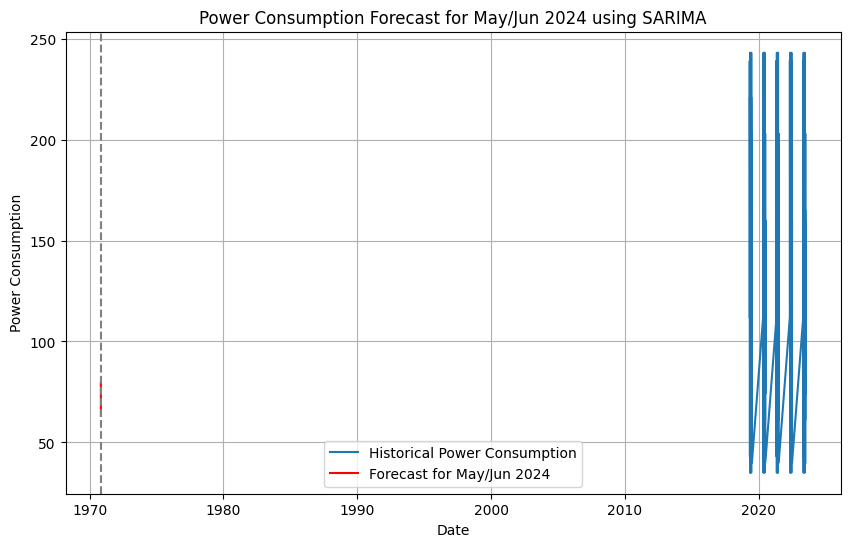

In [ ]:
import pandas as pd
import numpy as np
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Read data from the Excel file
excel_file = 'power_consumption_data.xlsx'
power_data = pd.read_excel(excel_file, parse_dates=['timestamp'])

# Step 2: Data Analysis and Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(power_data['timestamp'], power_data['power_consumption'], s=50, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Scatter Plot of Power Consumption')
plt.show()

# Step 3: Data Analysis and Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(power_data['power_consumption'], bins=20, edgecolor='black')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Power Consumption')
plt.show()

# Step 4: Prepare data for SARIMA
# Assuming you have already prepared the time series data in the 'power_data' DataFrame.

# Set the 'timestamp' column as the DataFrame index
power_data.set_index('timestamp', inplace=True)

# Step 5: Determine order and seasonal_order parameters using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Assuming the ACF plot shows a significant spike at lag 12, and PACF plot shows a significant spike at lag 1.

# Step 6: Train the SARIMA model on the entire dataset
order = (1, 1, 0)           # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

model = SARIMAX(power_data['power_consumption'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)

# Step 7: Forecast power requirements for May/Jun 2024
forecast_period = 2
forecast = fitted_model.get_forecast(steps=forecast_period)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean

# Step 8: Plot Forecast Results
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.show()

# Step 9: Evaluate Model Performance (using MAE and RMSE)
# Assuming you have actual data for May and June 2024 (replace the actual_power values below).

# Assuming 'forecast' contains the predictions made by the SARIMA model for May and June 2024.
forecast_values = forecast.predicted_mean

# Assuming actual_power contains the actual power consumption for May and June 2024.
actual_power = pd.Series([110, 115], index=forecast_values.index)  # Replace these values with the actual data

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_power, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_power, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Step 10: Save forecasted values to another Excel file
forecast_file = 'forecasted_power_consumption.xlsx'
forecast_values.to_excel(forecast_file, index=True, header=['forecasted_power_consumption'])

print(f"Forecasted power consumption for May and June 2024 has been saved to '{forecast_file}'.")

# Step 11: Display Forecasted Values as a Graph
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.grid(True)
plt.show()
# Step 12: Comparison Graph - Original vs. Forecasted Values
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.grid(True)

# Add a vertical line to indicate the separation between historical and forecasted data
plt.axvline(x=forecast_values.index[0], color='gray', linestyle='--')

plt.show()

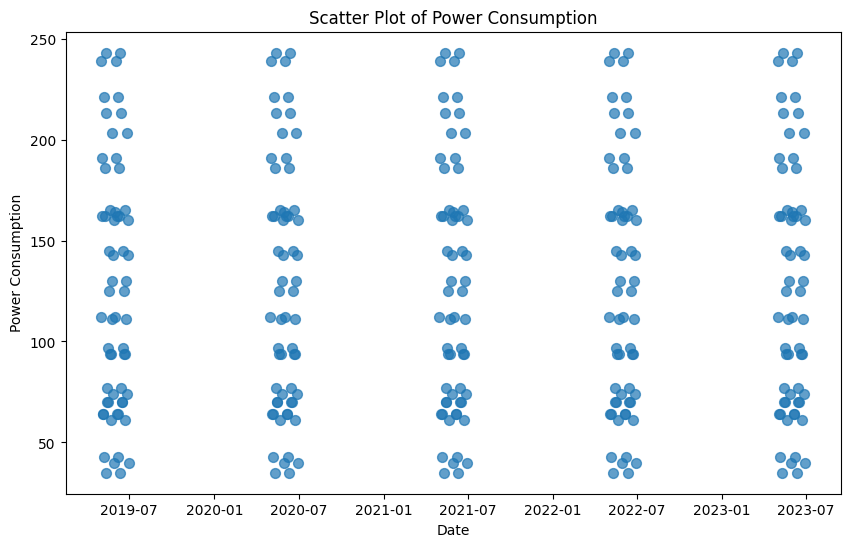

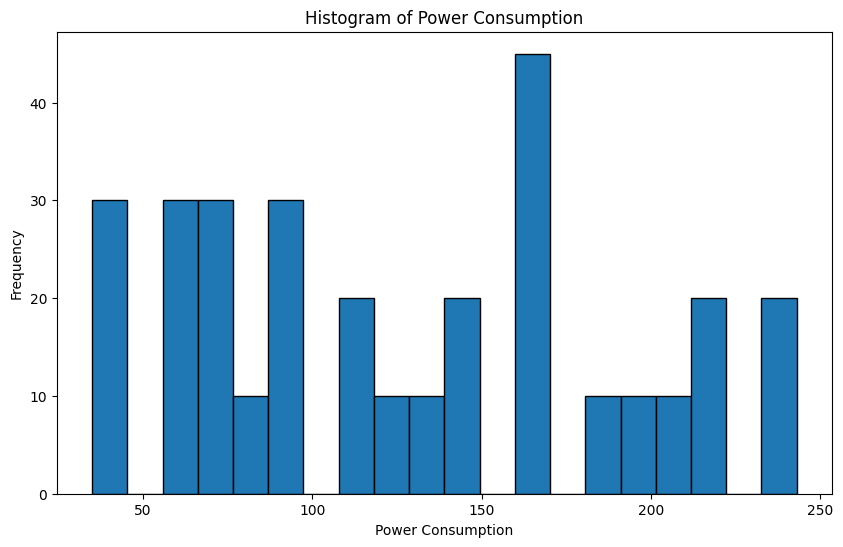

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


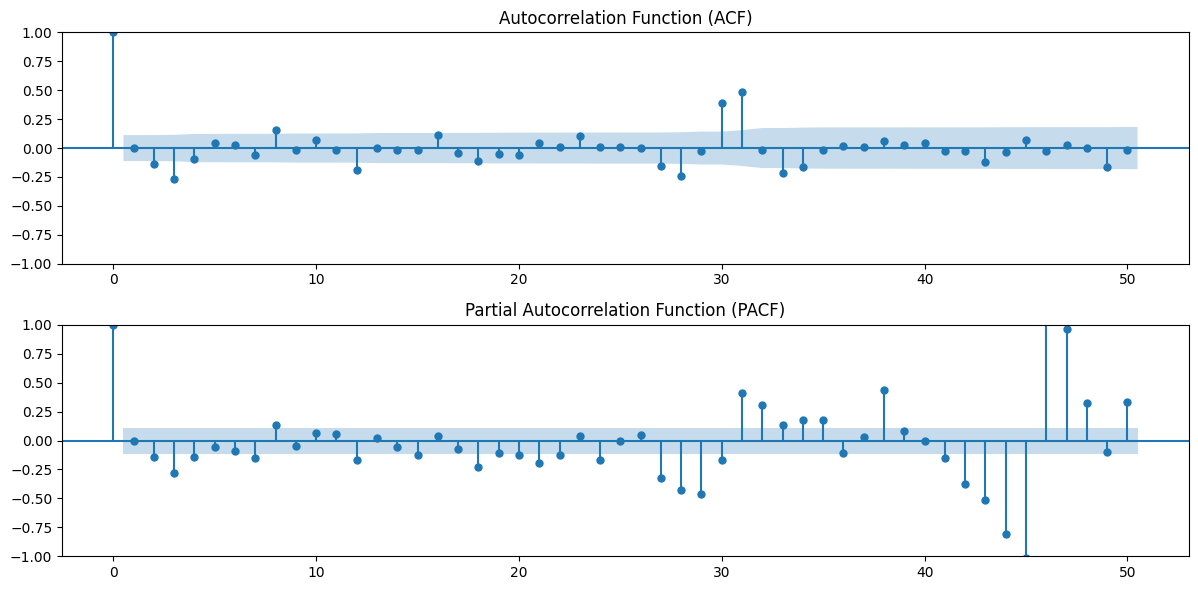

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


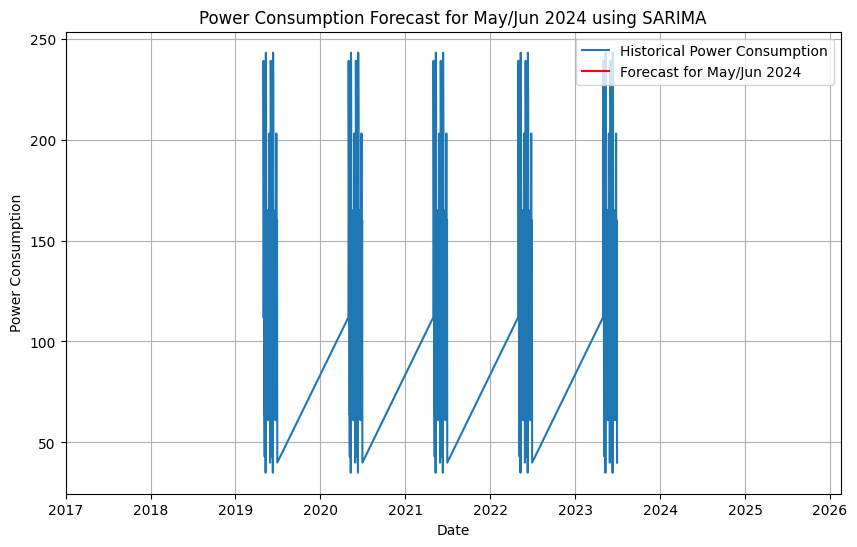

Mean Absolute Error (MAE): 41.11408322128745
Root Mean Squared Error (RMSE): 42.46018368307538
Forecasted power consumption for May and June 2024 has been saved to 'forecasted_power_consumption.xlsx'.


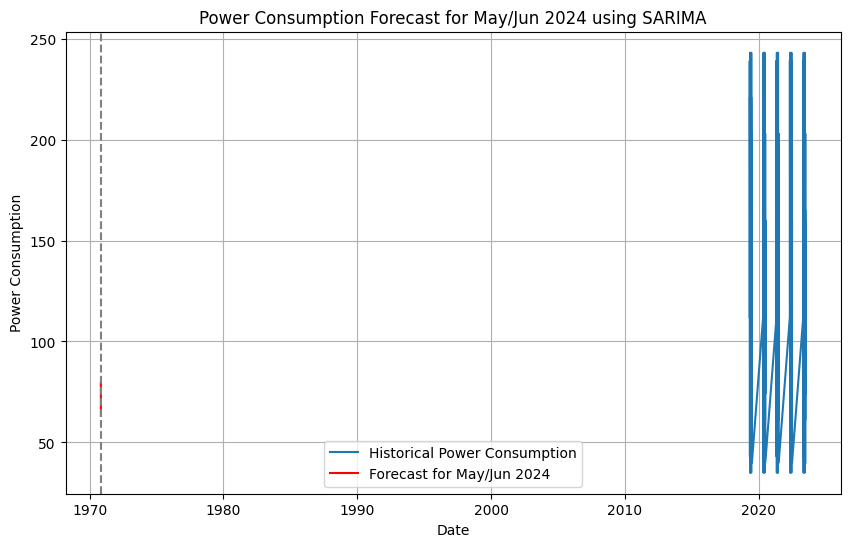

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Read data from the Excel file
excel_file = 'power_consumption_data.xlsx'
power_data = pd.read_excel(excel_file, parse_dates=['timestamp'])

# Step 2: Data Analysis and Visualization - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(power_data['timestamp'], power_data['power_consumption'], s=50, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Scatter Plot of Power Consumption')
plt.show()

# Step 3: Data Analysis and Visualization - Histogram
plt.figure(figsize=(10, 6))
plt.hist(power_data['power_consumption'], bins=20, edgecolor='black')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Power Consumption')
plt.show()

# Step 4: Prepare data for SARIMA
# Assuming you have already prepared the time series data in the 'power_data' DataFrame.

# Set the 'timestamp' column as the DataFrame index
power_data.set_index('timestamp', inplace=True)

# Step 5: Determine order and seasonal_order parameters using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(power_data['power_consumption'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Assuming the ACF plot shows a significant spike at lag 12, and PACF plot shows a significant spike at lag 1.

# Step 6: Train the SARIMA model on the entire dataset
order = (1, 1, 0)           # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

model = SARIMAX(power_data['power_consumption'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit(disp=False)

# Step 7: Forecast power requirements for May/Jun 2024
forecast_period = 2
forecast = fitted_model.get_forecast(steps=forecast_period)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean

# Step 8: Plot Forecast Results
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.grid(True)

# Add a vertical line to indicate the separation between historical and forecasted data
plt.axvline(x=forecast_values.index[0], color='gray', linestyle='--')

# Set the x-axis range to show data from 2017 onwards
plt.xlim(pd.to_datetime('2017-01-01'))

plt.show()

# Step 9: Evaluate Model Performance (using MAE and RMSE)
# Assuming you have actual data for May and June 2024 (replace the actual_power values below).

# Assuming 'forecast' contains the predictions made by the SARIMA model for May and June 2024.
# Assuming actual_power contains the actual power consumption for May and June 2024.

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_power, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_power, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 10: Save forecasted values to another Excel file
forecast_file = 'forecasted_power_consumption.xlsx'
forecast_values.to_excel(forecast_file, index=True, header=['forecasted_power_consumption'])

print(f"Forecasted power consumption for May and June 2024 has been saved to '{forecast_file}'.")

# Step 11: Comparison Graph - Original vs. Forecasted Values
plt.figure(figsize=(10, 6))
plt.plot(power_data.index, power_data['power_consumption'], label='Historical Power Consumption')
plt.plot(forecast_values.index, forecast_values, label='Forecast for May/Jun 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Forecast for May/Jun 2024 using SARIMA')
plt.legend()
plt.grid(True)

# Add a vertical line to indicate the separation between historical and forecasted data
plt.axvline(x=forecast_values.index[0], color='gray', linestyle='--')

plt.show()
